In [1]:
import pandas as pd

df= pd.read_csv(r'C:\Users\Marcelo\UNIFEI\github\AI-UNIFEI\Base de dados Planta de Processo\base2024_classificacao.csv')
df.head()

,dispositivo_1,dispositivo_2,dispositivo_3,dispositivo_4,dispositivo_5,dispositivo_6,dispositivo_7,dispositivo_8,dispositivo_9,dispositivo_10,...,dispositivo_42,dispositivo_43,dispositivo_44,dispositivo_45,dispositivo_46,dispositivo_47,dispositivo_48,dispositivo_49,dispositivo_50,falha
0,73.18,61.70,44.79,34.70,64.35,31.37,71.95,46.84,45.40,57.63,...,57.50,49.11,35.51,49.83,35.35,56.37,56.21,50.41,42.17,0
1,48.70,36.58,42.64,51.02,66.17,43.68,51.84,57.06,40.92,33.10,...,42.58,45.03,55.41,56.54,34.13,50.11,49.88,49.82,69.11,0
2,45.65,69.17,48.58,34.39,42.41,41.61,59.15,55.03,59.03,59.72,...,74.03,48.05,39.78,58.47,63.05,54.80,68.53,45.07,71.07,0
3,63.11,49.81,38.17,59.98,61.59,59.39,48.50,55.62,52.20,30.47,...,43.08,47.89,32.30,66.46,54.78,60.01,21.40,53.12,50.01,0
4,28.41,38.22,43.15,39.12,58.32,71.58,36.61,45.84,35.68,45.38,...,58.20,55.04,36.48,52.88,54.85,66.86,50.58,58.64,53.66,0


array([[<Axes: title={'center': 'falha'}>]], dtype=object)

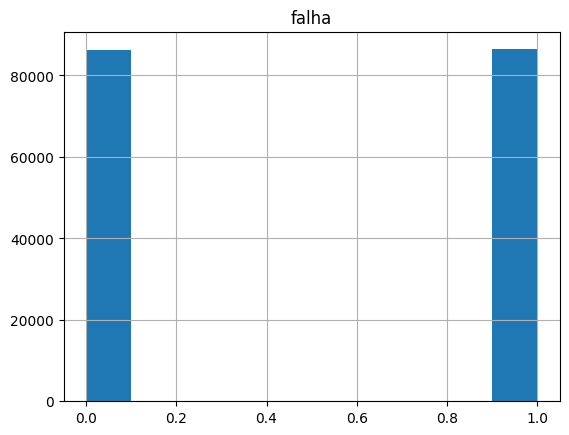

In [2]:
df.hist(['falha'])

In [3]:
X = df.drop('falha', axis=1).values
y= df['falha'].values

X.shape, y.shape

((172800, 50), (172800,))

In [5]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tecnicas= [
    LogisticRegression(random_state=42),
    PassiveAggressiveClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    HistGradientBoostingClassifier(random_state=42),
    #StackingClassifier(random_state=42),
    #SVC(random_state=42),
    LinearSVC(random_state=42),
    NuSVC(random_state=42),
    #MLPClassifier(random_state=42)
]

resultados= []
for clf in tecnicas:
    t0= time.time()
    nome=  clf.__class__.__name__
    print(nome)

    clf.fit(X_train, y_train)
    tempo= time.time()-t0

    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    resultados.append({
        'metodo': nome,
        'acuracia': acc,
        'f1': f1
        })
    res= pd.DataFrame(resultados)
    res.sort_values('f1', ascending=False)
    


LogisticRegression
PassiveAggressiveClassifier
AdaBoostClassifier


c:\Users\Marcelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


BaggingClassifier
ExtraTreesClassifier
GradientBoostingClassifier
RandomForestClassifier
HistGradientBoostingClassifier
LinearSVC


c:\Users\Marcelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Marcelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


NuSVC


In [9]:
res.sort_values('f1', ascending=False)

,metodo,acuracia,f1
6,RandomForestClassifier,0.921036,0.920095
4,ExtraTreesClassifier,0.914554,0.913247
7,HistGradientBoostingClassifier,0.912847,0.912130
3,BaggingClassifier,0.908073,0.905825
9,NuSVC,0.860301,0.856523
5,GradientBoostingClassifier,0.848814,0.847289
2,AdaBoostClassifier,0.756887,0.759076
0,LogisticRegression,0.739670,0.740952
1,PassiveAggressiveClassifier,0.716782,0.675980
8,LinearSVC,0.500463,0.011565
